In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv('fish_data.csv')

In [30]:
data.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [31]:
print(data['species'].value_counts())

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64


In [32]:
data.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [33]:
especies_unicas = data['species'].unique()
print(especies_unicas)

['Anabas testudineus' 'Coilia dussumieri' 'Otolithoides biauritus'
 'Otolithoides pama' 'Pethia conchonius' 'Polynemus paradiseus'
 'Puntius lateristriga' 'Setipinna taty' 'Sillaginopsis panijus']


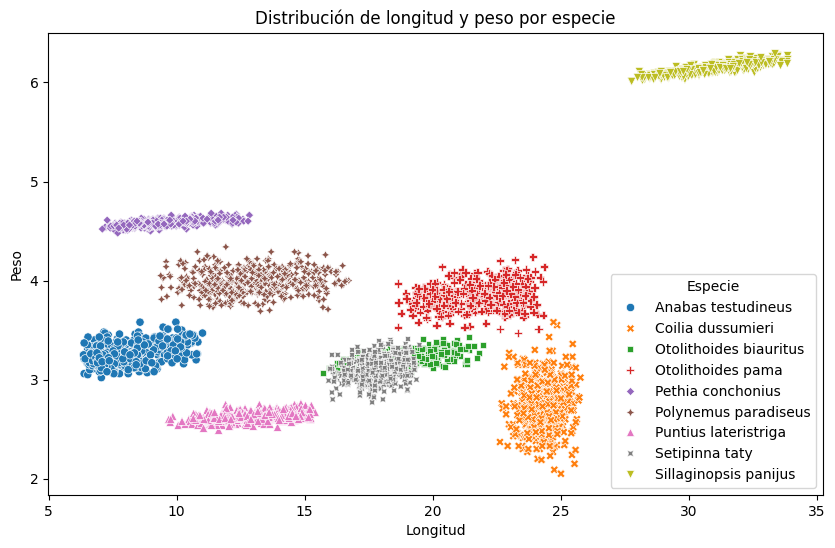

In [34]:
# Visualización de la distribución de la longitud y el peso
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='length', y='weight', hue='species', style='species')
plt.title('Distribución de longitud y peso por especie')
plt.xlabel('Longitud')
plt.ylabel('Peso')
plt.legend(title='Especie')
plt.show()


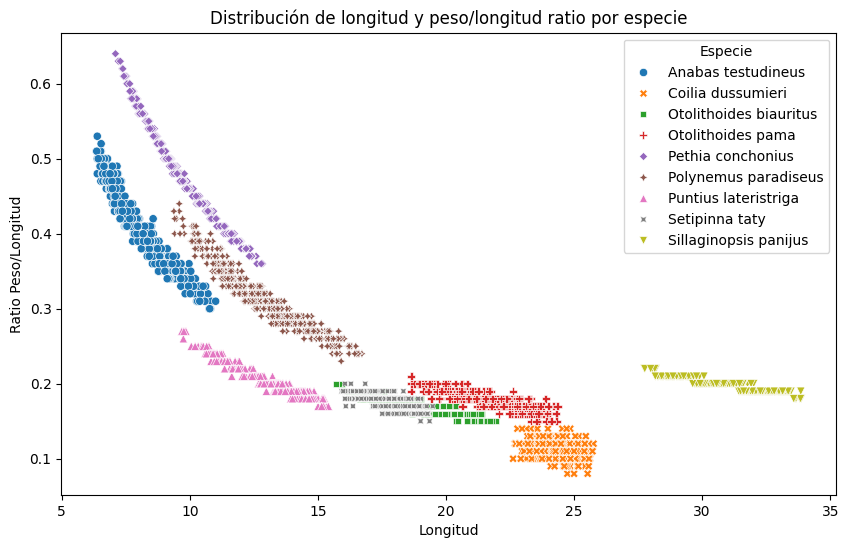

In [35]:
# Visualización de la relación entre longitud y peso/longitud ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='length', y='w_l_ratio', hue='species', style='species')
plt.title('Distribución de longitud y peso/longitud ratio por especie')
plt.xlabel('Longitud')
plt.ylabel('Ratio Peso/Longitud')
plt.legend(title='Especie')
plt.show()

# Aplique por lo menos tres métodos de clasificación a los datos

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [37]:
# Convertir la columna 'species' a valores numéricos
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])


In [38]:
X = data[['length', 'weight', 'w_l_ratio']]
y = data['species']

In [39]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## REGRESION LINEAL

In [40]:
# Aplicamos regresión lineal y redondeamos para hacer una predicción de clase
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test).round().astype(int) 

In [41]:
# Evaluación
print("Regresión Lineal - Clasificación")
print("Precisión:", accuracy_score(y_test, y_pred_lin_reg))
print(classification_report(y_test, y_pred_lin_reg))

Regresión Lineal - Clasificación
Precisión: 0.18995098039215685
              precision    recall  f1-score   support

           0       0.61      0.12      0.20       120
           1       0.47      0.52      0.49        77
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00        86
           4       0.07      0.26      0.11        89
           5       0.36      0.44      0.39       102
           6       0.00      0.00      0.00        65
           7       0.00      0.00      0.00       100
           8       1.00      0.38      0.55        86

    accuracy                           0.19       816
   macro avg       0.28      0.19      0.19       816
weighted avg       0.29      0.19      0.20       816



### SVC

In [42]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [43]:
print("\nSVC")
print("Precisión:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


SVC
Precisión: 0.875
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       1.00      0.99      0.99        77
           2       0.60      0.33      0.43        91
           3       0.94      0.92      0.93        86
           4       0.93      0.92      0.93        89
           5       0.92      0.89      0.91       102
           6       0.98      1.00      0.99        65
           7       0.59      0.87      0.70       100
           8       1.00      1.00      1.00        86

    accuracy                           0.88       816
   macro avg       0.88      0.88      0.87       816
weighted avg       0.88      0.88      0.87       816



### REGRESION LOGISTICA

In [44]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

c:\Users\magic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
print("\nRegresión Logística")
print("Precisión:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Regresión Logística
Precisión: 0.9080882352941176
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       1.00      1.00      1.00        77
           2       0.91      0.32      0.47        91
           3       1.00      0.98      0.99        86
           4       0.97      1.00      0.98        89
           5       0.98      0.95      0.97       102
           6       0.97      0.98      0.98        65
           7       0.60      0.96      0.74       100
           8       1.00      1.00      1.00        86

    accuracy                           0.91       816
   macro avg       0.93      0.91      0.90       816
weighted avg       0.93      0.91      0.90       816



### DESCARGAR EL MODELO

In [46]:
import joblib

# Crear un diccionario con los modelos
modelos = {
    "regresion_lineal": lin_reg,
    "svc": svc,
    "regresion_logistica": log_reg
}

# Guardar el diccionario en un solo archivo
joblib.dump(modelos, 'modelos_clasificacion.pkl')
print("Todos los modelos guardados en un solo archivo exitosamente.")


Todos los modelos guardados en un solo archivo exitosamente.


# Realice el despliegue de la aplicación utilizando la librería streamlit